In [1]:
import cv2
import numpy as np
from Handler import utils
import matplotlib.pyplot as plt

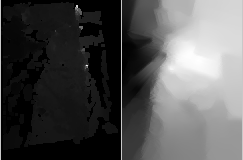

In [2]:

path_prefix = "./SparseVsDenseDepth/"
image_number = 0
background_image = cv2.imread(f"{path_prefix}background_{image_number}.png")  # because of problem with saving images
background_image = cv2.rotate(background_image, cv2.ROTATE_90_COUNTERCLOCKWISE)
if background_image is None:
    raise FileNotFoundError("background_image does not exist")

sparse_depth = np.fromfile(f"{path_prefix}sparse_{image_number}.txt", dtype=np.float32)  # depht values in meters
sparse_depth = sparse_depth.reshape((120, 160))
sparse_depth = cv2.flip(sparse_depth, 1)
sparse_depth = cv2.rotate(sparse_depth, cv2.ROTATE_90_CLOCKWISE)

dense_depth = np.fromfile(f"{path_prefix}dense_{image_number}.txt", dtype=np.float32)  # depht values in meters
dense_depth = dense_depth.reshape((120, 160))
dense_depth = cv2.flip(dense_depth, 1)
dense_depth = cv2.rotate(dense_depth, cv2.ROTATE_90_CLOCKWISE)
utils.visualize_image(
    utils.concat_images([utils.rescale_depth_images(sparse_depth), utils.rescale_depth_images(dense_depth)], mode=utils.ConcatMode.HORIZONTAL))

In [3]:
def adjust(depth_image):
    depth_image = depth_image.copy()
    depth_image -= depth_image[depth_image != 0].min()
    depth_image = depth_image / depth_image.max() * 255
    output = utils.rescale_depth_images(depth_image) / 255
    return output

In [4]:
dense_depth[dense_depth != 0].min(), dense_depth.max(), dense_depth.sum()

(0.48900002, 1.748, 23282.443)

In [5]:
sparse_depth[sparse_depth != 0].min(), sparse_depth.max(), sparse_depth.sum()

(0.298, 15.833001, 15233.008)

In [6]:
sparse_depth[sparse_depth < 4].sum()

14745.899

(array([1.6622e+04, 2.4910e+03, 2.3000e+01, 3.5000e+01, 1.6000e+01,
        6.0000e+00, 0.0000e+00, 0.0000e+00, 5.0000e+00, 2.0000e+00]),
 array([ 0.       ,  1.5833001,  3.1666002,  4.7499003,  6.3332005,
         7.9165006,  9.499801 , 11.083101 , 12.666401 , 14.249701 ,
        15.833001 ], dtype=float32),
 <BarContainer object of 10 artists>)

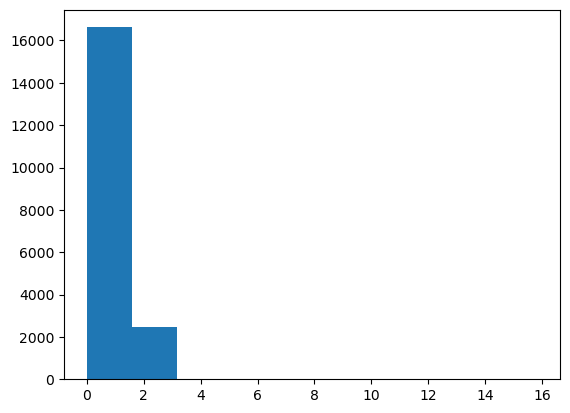

In [7]:
plt.hist(sparse_depth.flatten())

In [8]:
sparse_depth[sparse_depth > 4] = 4

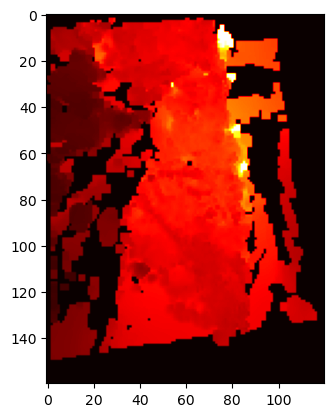

In [9]:
plt.imshow(adjust(sparse_depth), cmap='hot')

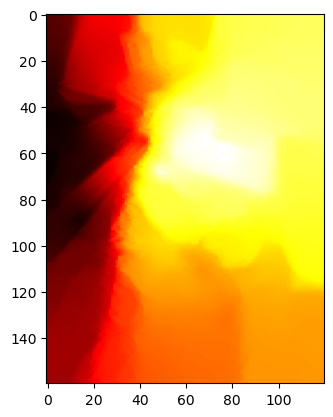

In [10]:
plt.imshow(adjust(dense_depth), cmap='hot')

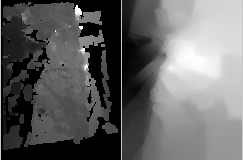

In [11]:
utils.visualize_image(
    utils.concat_images([utils.rescale_depth_images(sparse_depth), utils.rescale_depth_images(dense_depth)], mode=utils.ConcatMode.HORIZONTAL))

# Presentation Downscaling

In [26]:
import cv2
from Handler import utils
import math

In [27]:
video = None
img_org = cv2.imread('PixelExampleBackground.png')
save_video = True
save_path = './test'

aspect_ratio = 76/160
width = 2
height = int(width * 2.1)
factor = 1.
while True:
    frame = cv2.resize(img_org, (int(width), height))
    frame = cv2.resize(frame, (684, 1440), interpolation=cv2.INTER_AREA)
    frame = utils.write_text_on_image(frame, text=f"(w,h)=({int(width)},{height})")
    cv2.imshow(f"Frame", frame)
    if save_path != "" and save_video:
        if video is None:
            h, w, _ = frame.shape
            video = cv2.VideoWriter(f'{save_path}.mp4', cv2.VideoWriter_fourcc(*'MJPG'), 10, (w, h))
        video.write(frame)

    if cv2.waitKey(60) & 0xFF == ord('q'):
        break
    height += 1 * math.floor(factor)
    width = width + aspect_ratio * math.floor(factor)
    factor = factor + 0.01
    if factor > 4.5:
        break
    if width > 200:
        break
save_video = False
cv2.destroyAllWindows()

KeyboardInterrupt: 

In [ ]:
img = cv2.imread('PixelExampleBackground.png')
img = cv2.resize(img, (76, 160))
img = cv2.resize(img, (684,  1440), interpolation=cv2.INTER_AREA)
utils.visualize_image(img)